In [1]:
# Import all libraries relative to our project
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

In [2]:
#Read the csv file
df = pd.read_csv(r'synthetic_customer_data.csv')

df.head()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Product_Category,Customer_Segment,Met_Target
0,56,21920,73.68,3,7,Furniture,Low-Value,1
1,69,126121,50.10,9,20,Groceries,Low-Value,1
2,46,97219,57.28,5,43,Groceries,Low-Value,1
3,32,96872,13.72,5,6,Clothing,High-Value,1
4,60,101132,93.77,4,36,Beauty,Medium-Value,1


In [3]:
#Information with regards to our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Spending_Score      5000 non-null   float64
 3   Engagement_Level    5000 non-null   int64  
 4   Purchase_Frequency  5000 non-null   int64  
 5   Product_Category    5000 non-null   object 
 6   Customer_Segment    5000 non-null   object 
 7   Met_Target          5000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 312.6+ KB


In [4]:
df.isnull()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Product_Category,Customer_Segment,Met_Target
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Age                   0
Income                0
Spending_Score        0
Engagement_Level      0
Purchase_Frequency    0
Product_Category      0
Customer_Segment      0
Met_Target            0
dtype: int64

In [6]:
#Statistics of numerical columns
df.describe()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Met_Target
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.584600,84632.847400,50.138912,4.946600,24.979000,0.593800
std,14.919094,37591.056659,28.841016,2.582844,14.130283,0.491172
min,18.000000,20060.000000,0.020000,1.000000,1.000000,0.000000
25%,31.000000,51618.250000,25.935000,3.000000,13.000000,0.000000
50%,43.000000,85510.500000,50.415000,5.000000,25.000000,1.000000
75%,56.000000,117301.000000,74.770000,7.000000,37.000000,1.000000
max,69.000000,149974.000000,99.980000,9.000000,49.000000,1.000000


In [7]:
#Value counts of categorical columns
cat_cols = ['Product_Category','Customer_Segment']

for col in cat_cols:
    val_counts = df[col].value_counts()
    print(val_counts)

Product_Category
Beauty         1079
Furniture      1055
Electronics     972
Groceries       957
Clothing        937
Name: count, dtype: int64
Customer_Segment
Low-Value       2013
Medium-Value    1983
High-Value      1004
Name: count, dtype: int64


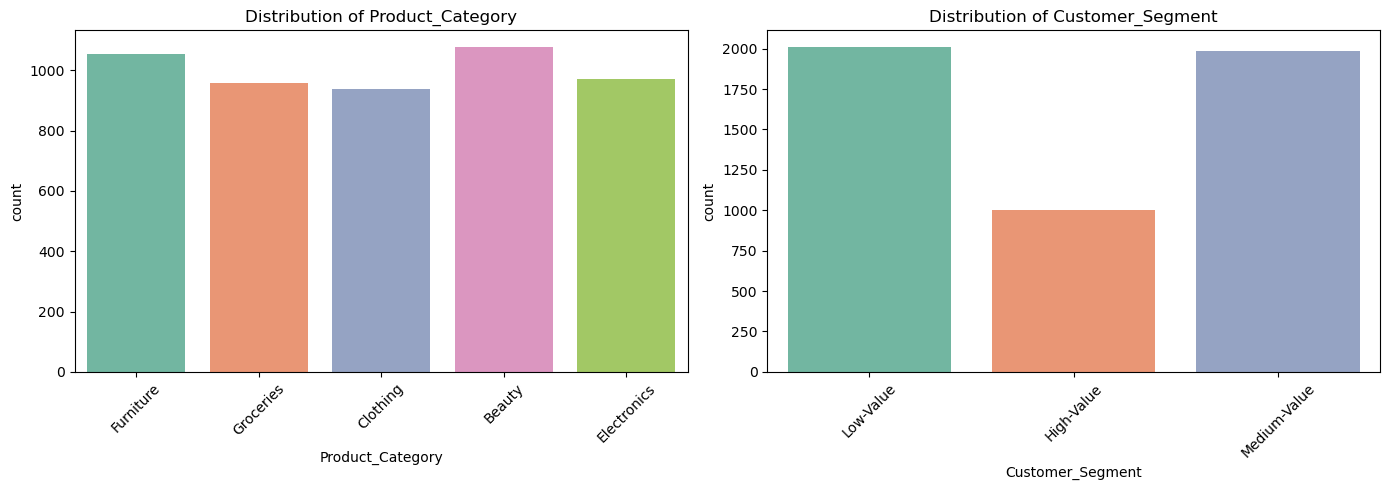

In [8]:
# Plotting countplots for the categorical columns
# Create subplots dynamically
fig, axes = plt.subplots(1, len(cat_cols), figsize=(14, 5))

# If only one column, make sure axes is iterable
if len(cat_cols) == 1:
    axes = [axes]

# Loop through categorical columns and plot countplots
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

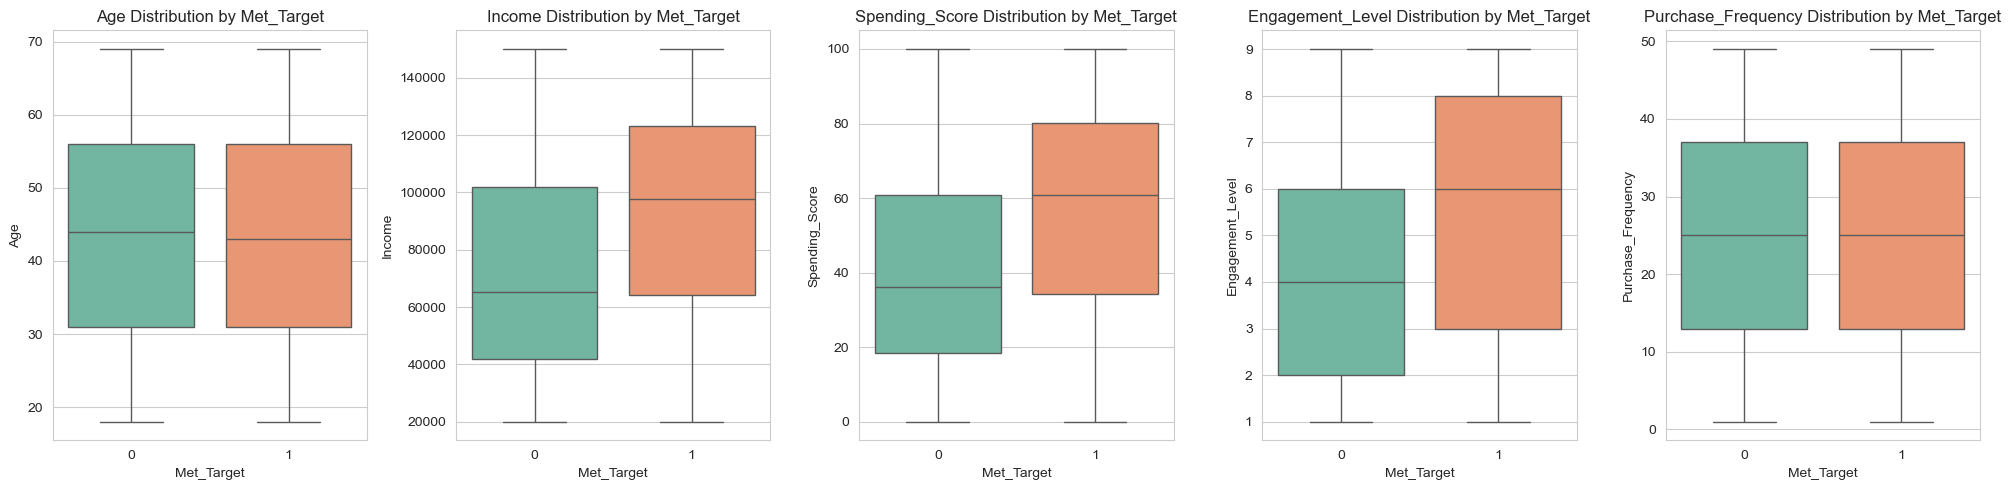

In [9]:
# Define numerical columns for boxplots
numerical_columns = ["Age", "Income", "Spending_Score", "Engagement_Level", "Purchase_Frequency"]

# Define the categorical variable for grouping (e.g., Met_Target)
group_by_col = "Met_Target"

# Set the style
sns.set_style("whitegrid")

# Create subplots dynamically
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(20, 5))

# If only one column, make sure axes is iterable
if len(numerical_columns) == 1:
    axes = [axes]

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=group_by_col, y=col, data=df, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} Distribution by {group_by_col}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [10]:
#Perform encoding on the columns

df = pd.get_dummies(df)

df.head()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Met_Target,Product_Category_Beauty,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Furniture,Product_Category_Groceries,Customer_Segment_High-Value,Customer_Segment_Low-Value,Customer_Segment_Medium-Value
0,56,21920,73.68,3,7,1,False,False,False,True,False,False,True,False
1,69,126121,50.10,9,20,1,False,False,False,False,True,False,True,False
2,46,97219,57.28,5,43,1,False,False,False,False,True,False,True,False
3,32,96872,13.72,5,6,1,False,True,False,False,False,True,False,False
4,60,101132,93.77,4,36,1,True,False,False,False,False,False,False,True


In [30]:
#Perform encoding on the dummified columns

le = LabelEncoder()

unique_counts = df.nunique()


cols_to_encode = unique_counts[unique_counts<=2].index.to_list()


for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Income,Spending_Score,Engagement_Level,Purchase_Frequency,Met_Target,Product_Category_Beauty,Product_Category_Clothing,Product_Category_Electronics,Product_Category_Furniture,Product_Category_Groceries,Customer_Segment_High-Value,Customer_Segment_Low-Value,Customer_Segment_Medium-Value
0,56,21920,73.68,3,7,1,0,0,0,1,0,0,1,0
1,69,126121,50.10,9,20,1,0,0,0,0,1,0,1,0
2,46,97219,57.28,5,43,1,0,0,0,0,1,0,1,0
3,32,96872,13.72,5,6,1,0,1,0,0,0,1,0,0
4,60,101132,93.77,4,36,1,1,0,0,0,0,0,0,1


In [12]:
#Perform correlations amongst the variables
#Distinguish the dependent variable from the independent variable
y = df['Met_Target']
X = df.drop('Met_Target', axis = 1)

target_correlations = X.corrwith(y)
print(target_correlations)

Age                             -0.008044
Income                           0.269389
Spending_Score                   0.271836
Engagement_Level                 0.184733
Purchase_Frequency               0.003526
Product_Category_Beauty         -0.004663
Product_Category_Clothing        0.002723
Product_Category_Electronics     0.012170
Product_Category_Furniture      -0.033394
Product_Category_Groceries       0.024568
Customer_Segment_High-Value      0.003888
Customer_Segment_Low-Value      -0.011890
Customer_Segment_Medium-Value    0.008736
dtype: float64


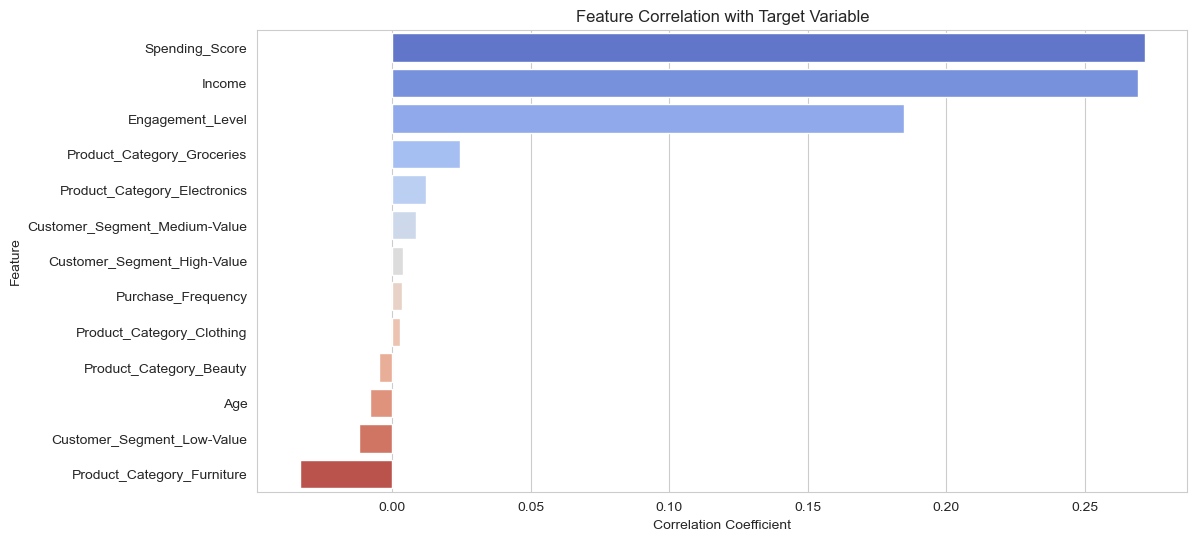

In [13]:
#Plot the chart showing the relatiosnhip between X and y
# Convert to DataFrame for easier plotting
correlation_df = target_correlations.reset_index()
correlation_df.columns = ["Feature", "Correlation"]

# Sort values for better visualization
correlation_df = correlation_df.sort_values(by="Correlation", ascending=False)

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Create a barplot
sns.barplot(x="Correlation", y="Feature", data=correlation_df, palette="coolwarm")

# Add title
plt.title("Feature Correlation with Target Variable")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")

# Show plot
plt.show()

In [14]:
in_variables_correlations = X.corr()

print(in_variables_correlations)

                                    Age    Income  Spending_Score  \
Age                            1.000000 -0.015931       -0.003697   
Income                        -0.015931  1.000000        0.022116   
Spending_Score                -0.003697  0.022116        1.000000   
Engagement_Level               0.005794  0.004410        0.012645   
Purchase_Frequency             0.003732  0.016926       -0.015504   
Product_Category_Beauty        0.000822 -0.014792       -0.013958   
Product_Category_Clothing     -0.003840  0.019365        0.002079   
Product_Category_Electronics  -0.013458  0.015343        0.017089   
Product_Category_Furniture    -0.002062 -0.027184        0.005460   
Product_Category_Groceries     0.018626  0.009018       -0.010320   
Customer_Segment_High-Value    0.004587  0.004934       -0.008108   
Customer_Segment_Low-Value    -0.001936  0.002772        0.005940   
Customer_Segment_Medium-Value -0.001816 -0.006819        0.000685   

                               En

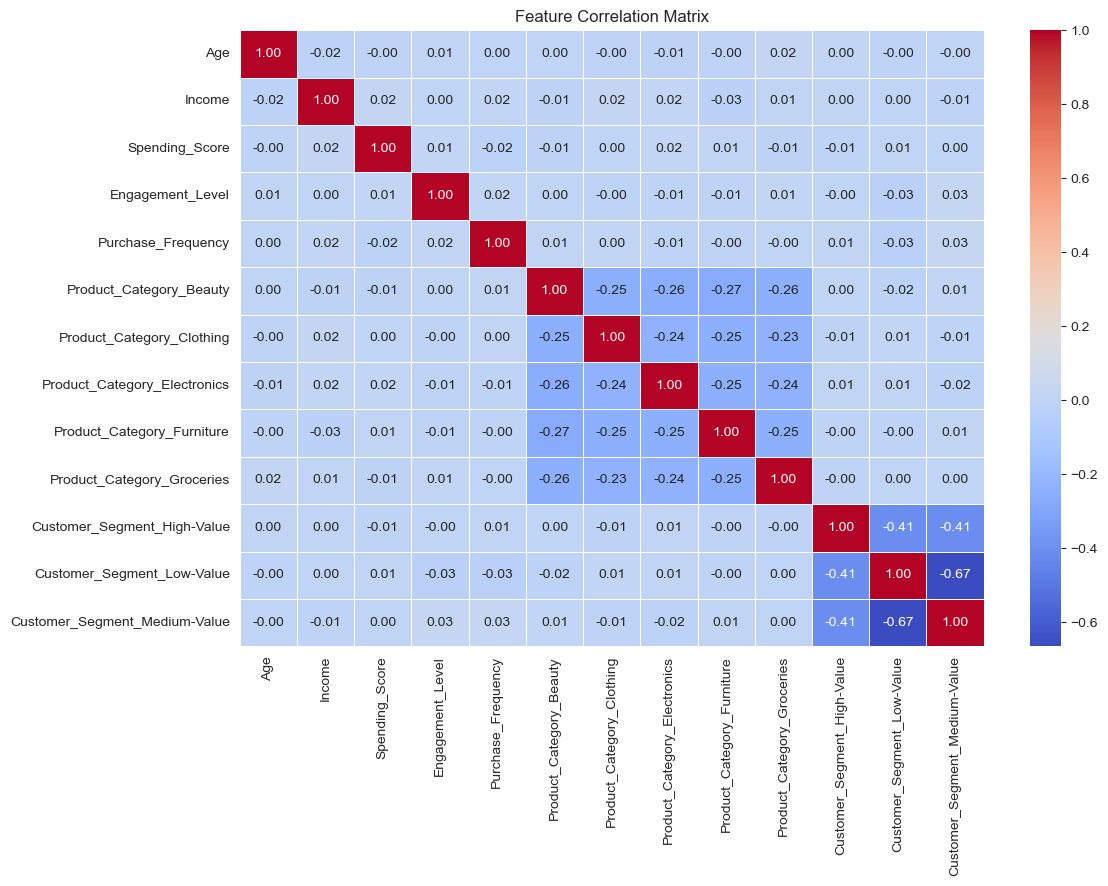

In [15]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(in_variables_correlations, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Feature Correlation Matrix")

# Show plot
plt.show()

In [16]:
#Check for class imbalances
y_vals = y.value_counts()
print(y_vals)

Met_Target
1    2969
0    2031
Name: count, dtype: int64


In [35]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

y_resampled.value_counts()

Met_Target
1    2969
0    2969
Name: count, dtype: int64

In [18]:
#Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size = 0.2, random_state=42)

In [23]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform( X_test)

In [24]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=500)
}

# Dictionary to store results
results = {}


Training Decision Tree...

Accuracy of Decision Tree: 0.7071

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.68      0.70       608
           1       0.69      0.74      0.71       580

    accuracy                           0.71      1188
   macro avg       0.71      0.71      0.71      1188
weighted avg       0.71      0.71      0.71      1188



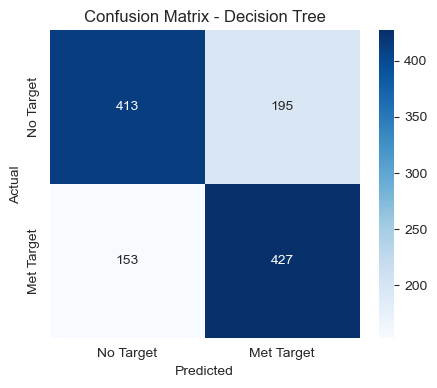


Training Random Forest...

Accuracy of Random Forest: 0.7407

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       608
           1       0.73      0.74      0.73       580

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



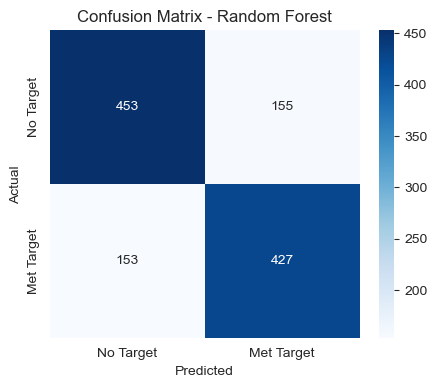


Training XGBoost...

Accuracy of XGBoost: 0.7374

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.72      0.74       608
           1       0.72      0.76      0.74       580

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



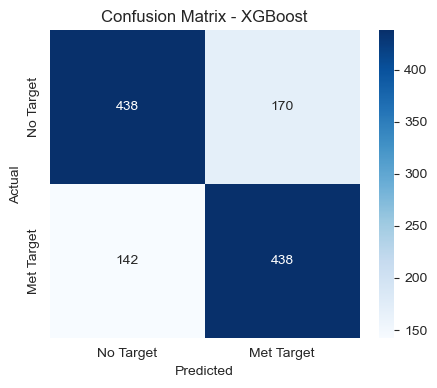


Training Logistic Regression...

Accuracy of Logistic Regression: 0.7424

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       608
           1       0.72      0.78      0.75       580

    accuracy                           0.74      1188
   macro avg       0.74      0.74      0.74      1188
weighted avg       0.74      0.74      0.74      1188



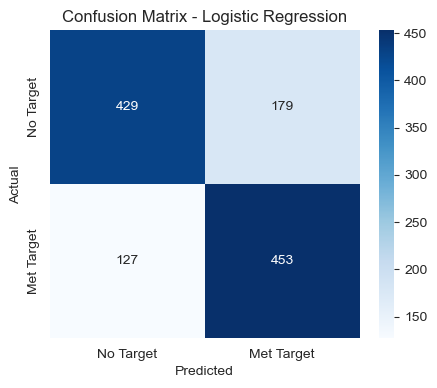

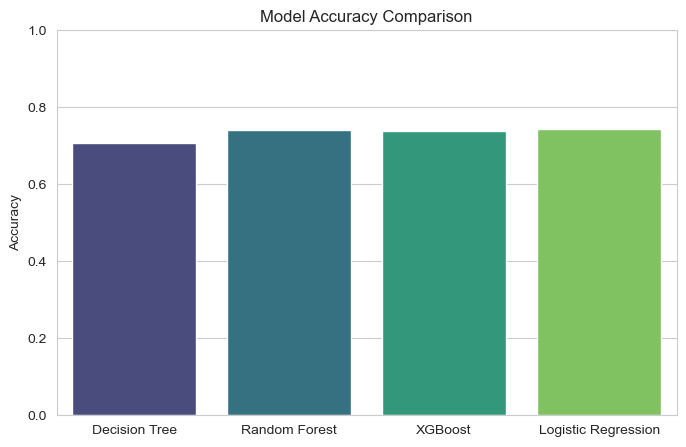

In [25]:
# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...\n")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {name}: {accuracy:.4f}")
    
    # Store results
    results[name] = {
        "model": model,
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred)
    }

    # Print classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

        # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Target", "Met Target"], yticklabels=["No Target", "Met Target"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Compare accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[results[m]["accuracy"] for m in results], palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [36]:
y_test.value_counts()

Met_Target
0    608
1    580
Name: count, dtype: int64

In [27]:
#Hyperparameter Tuning
# Create a parameter grid for each model
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200]
}

# Instantiate classifiers
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lr = LogisticRegression()

# Apply GridSearchCV to DecisionTree
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train_scaled, y_train)

# Apply GridSearchCV to RandomForest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)

# Apply GridSearchCV to XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train_scaled, y_train)

# Apply GridSearchCV to Logistic Regression
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train_scaled, y_train)

# Best Parameters and Best Score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best score for XGBoost:", grid_search_xgb.best_score_)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.7052631578947368
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score for Random Forest: 0.7225263157894737
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score for XGBoost: 0.7261052631578947
Best parameters for Logistic Regression: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Best score for Logistic Regression: 0.7229473684210526
